## Context

ABC Supermarket is planning for the year-end sale - they want to launch a new offer i.e. gold membership for only \\$499 that is of \\$999 on normal days (that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - the best way to reduce the cost of the campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year's campaign.

We will build a model for classifying whether customers will reply with a positive
response or not.

## Column Definitions
- Response (target) - 1 if customer accepted the offer in the last campaign, 0
otherwise
- Complain - 1 if a customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- ID - unique customer-id
- Year_Birth - customer's year of birth

## IMPORT STATEMENTS

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## LOADING THE DATASET

In [2]:
df = pd.read_excel("marketing_data.xlsx")

## DATA INSPECTION

In [3]:
df.shape

(2240, 22)

In [4]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,21,32,5,3,6,2,9,4,0,0


In [5]:
df.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/14,99,0,...,7,6,12,1,1,0,3,8,0,0
2231,8595,1973,Graduation,Widow,42429.0,0,1,2014-11-02 00:00:00,99,55,...,2,0,4,2,1,1,3,5,0,0
2232,7232,1973,Graduation,Widow,42429.0,0,1,2014-11-02 00:00:00,99,55,...,2,0,4,2,1,1,3,5,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/13,99,321,...,33,26,34,3,9,3,5,4,0,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,2012-01-09 00:00:00,99,169,...,188,0,144,1,8,5,4,7,1,0


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## INITIAL EXPLORATORY ANALYSIS

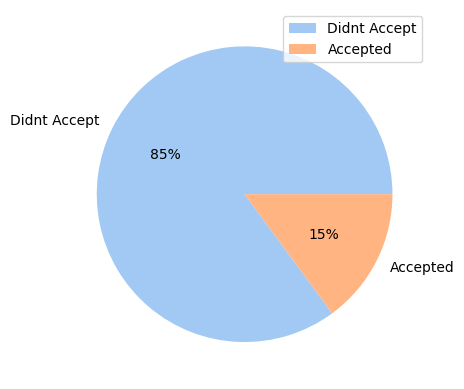

In [9]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

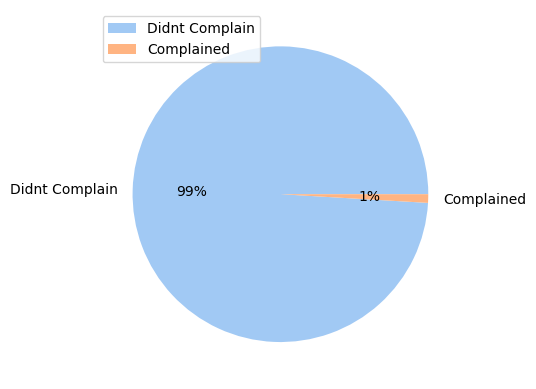

In [10]:
colors = sns.color_palette('pastel')[0:len(df['Complain'].value_counts())]

#create pie chart
plt.pie(df['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

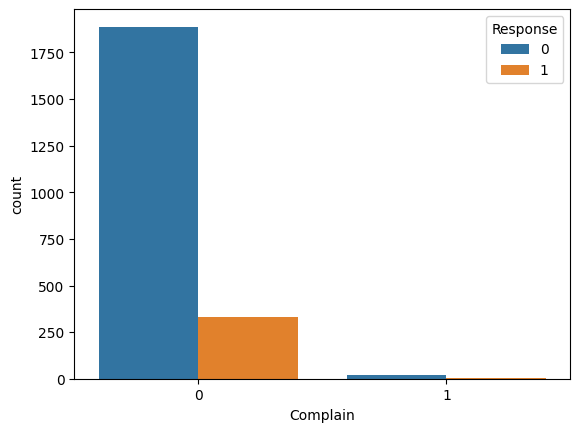

In [11]:
sns.barplot(x = 'Complain', y='count', hue = 'Response',data=df[['Complain', 'Response']].value_counts().reset_index())
    
plt.show()

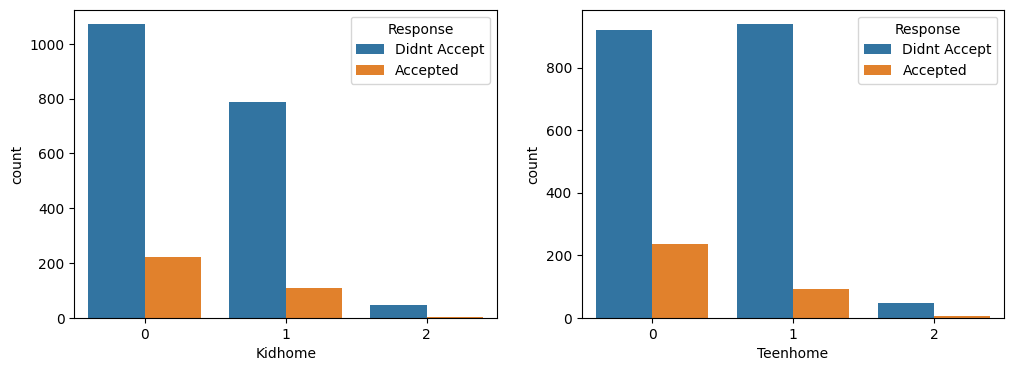

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
    tmp = df[[col, 'Response']].value_counts().to_frame().reset_index()
    tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

    sns.barplot(x = col, y='count', 
                   hue = 'Response',data=tmp, ax=ax)
    
plt.show()

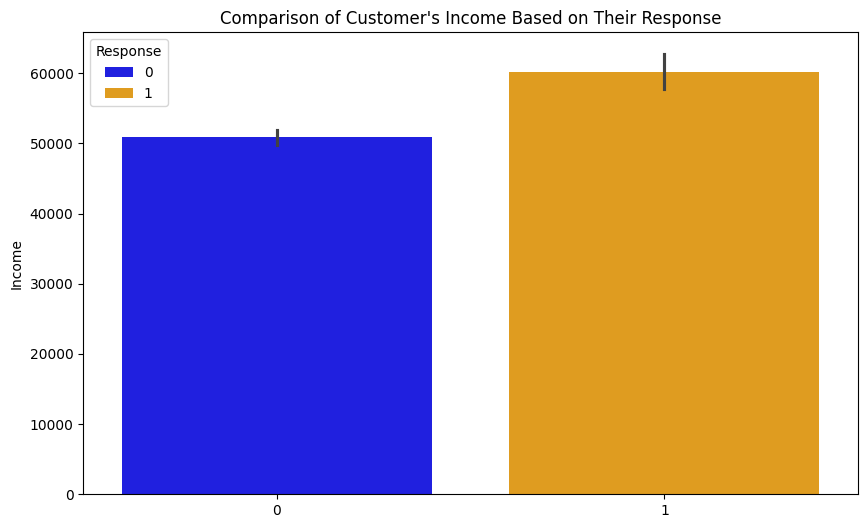

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df, x='Response', y='Income', hue='Response', palette=['blue', 'orange'], ax=ax)

ax.set_title("Comparison of Customer's Income Based on Their Response", fontsize=12)

# Remove x-label
ax.set_xlabel(None)

plt.show()

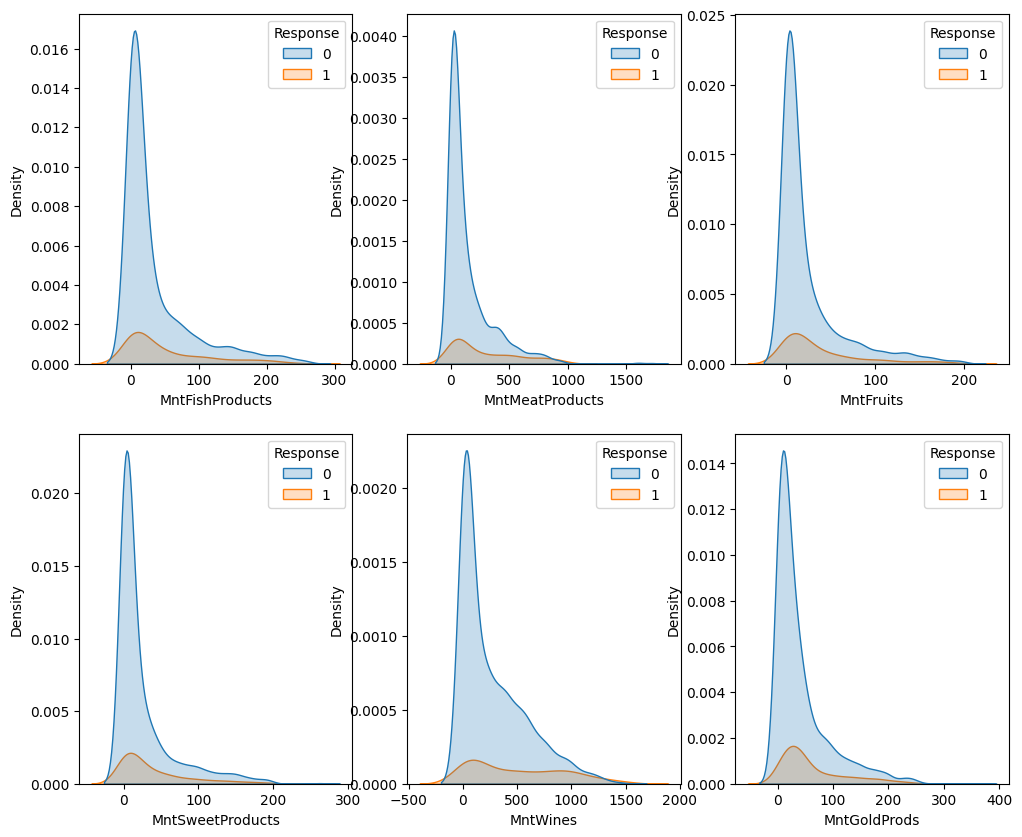

In [14]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))

for i, ax, col in zip(range(6), axes.flat, ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']):
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
plt.show()

In [15]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2014-02-03 00:00:00,17,25,...,0,0,3,1,1,0,3,7,0,0
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,3,263,362,0,27,0,0,1,0,0
525,8268,1961,PhD,Married,NaN,0,1,2013-11-07 00:00:00,23,352,...,10,0,15,3,6,1,7,6,0,0
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,17,4,17,3,3,0,3,8,0,0
899,10475,1970,Master,Together,NaN,0,1,2013-01-04 00:00:00,39,187,...,26,20,14,2,4,2,6,5,0,0
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,0,1,1,1,0,2,7,0,0
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-12-01 00:00:00,49,5,...,2,0,4,1,1,0,2,7,0,0
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,94,66,96,7,4,10,4,3,0,0


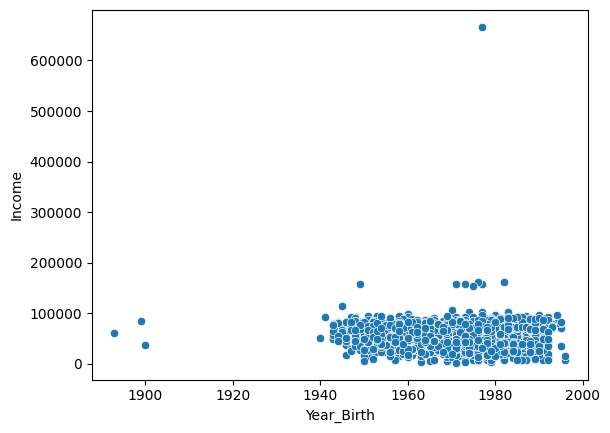

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(df, x='Year_Birth', y='Income', ax=ax)
plt.show()

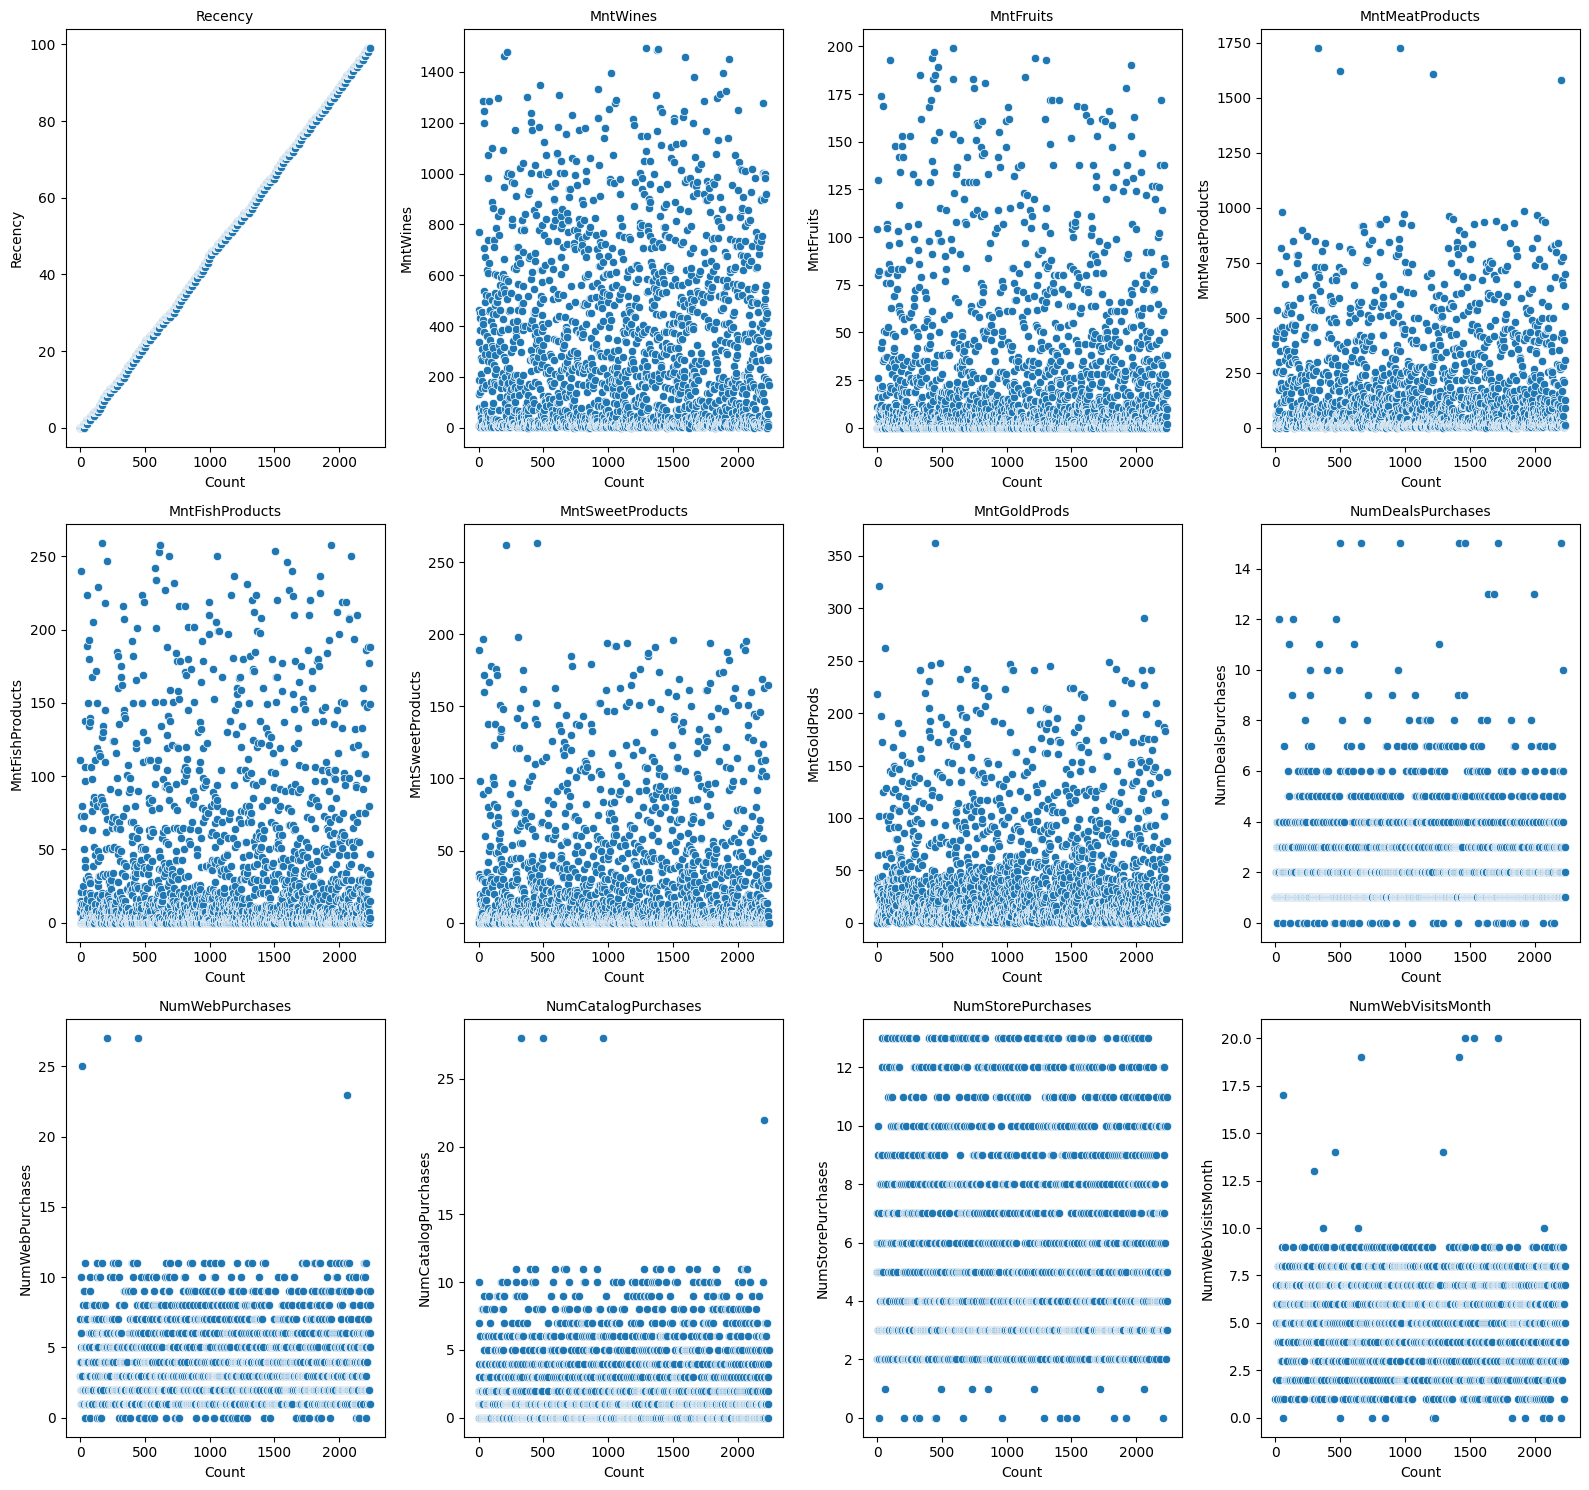

In [17]:
list_boxplots = ['Recency', 'MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        # For scatter plots, you need an X and Y. Using index as X.
        sns.scatterplot(x=np.arange(len(df)), y=df[list_boxplots[cont]], ax=ax[i][j])
        ax[i][j].set_title(list_boxplots[cont], fontsize=10)
        ax[i][j].set_xlabel('Count')  # Optionally set or hide the x-label as it might not be very informative
        ax[i][j].set_ylabel(list_boxplots[cont])  # Optionally adjust or remove the y-label for clarity/simplicity
        cont += 1

plt.tight_layout()
plt.show()

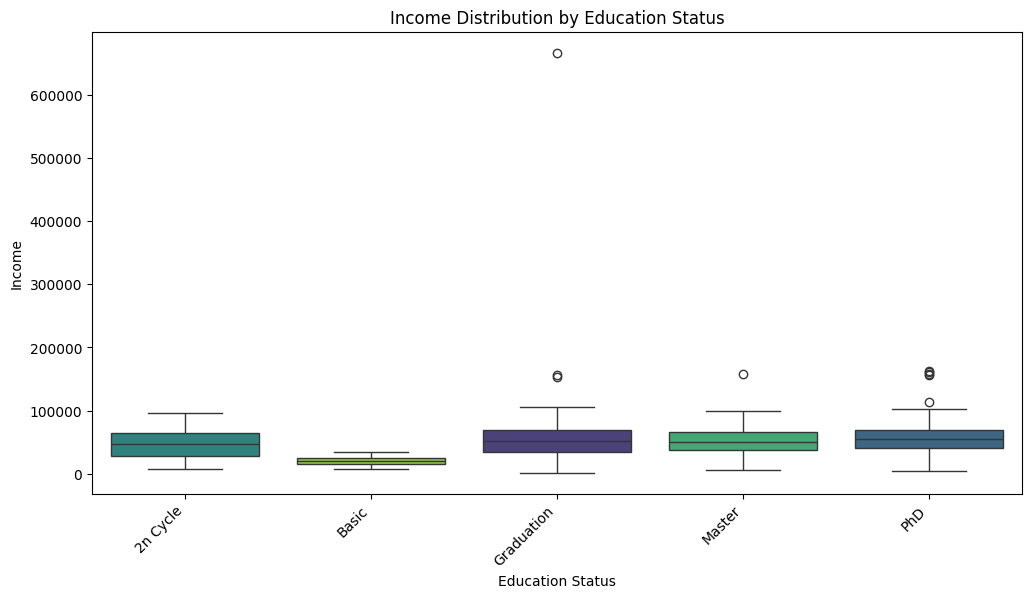

In [18]:
# Calculate the average income for each education status
education_income_avg = df.groupby('Education')['Income'].mean()

# Fill missing values in 'Income' with the corresponding education status average
df['Income'] = df.apply(lambda row: education_income_avg[row['Education']] if pd.isnull(row['Income']) else row['Income'], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='Education', y='Income', order=education_income_avg.index, hue='Education', palette='viridis', dodge=False)

ax.set_title('Income Distribution by Education Status')
ax.set_xlabel('Education Status')
ax.set_ylabel('Income')

plt.xticks(rotation=45, ha='right')
plt.show()

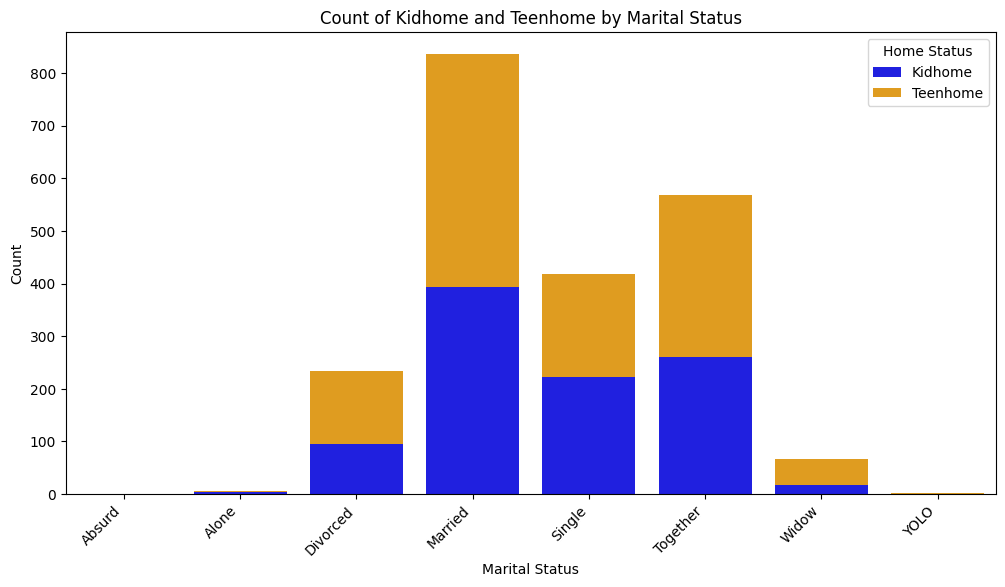

In [19]:
# Assuming 'df' is your DataFrame
marital_status_counts = df['Marital_Status'].value_counts()

# Filter the DataFrame for only relevant columns
subset_df = df[['Marital_Status', 'Kidhome', 'Teenhome']]

# Group by 'Marital_Status' and calculate the sum of 'Kidhome' and 'Teenhome' for each group
kids_teens_counts = subset_df.groupby('Marital_Status')[['Kidhome', 'Teenhome']].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=kids_teens_counts, x='Marital_Status', y='Kidhome', label='Kidhome', color='blue')
sns.barplot(data=kids_teens_counts, x='Marital_Status', y='Teenhome', bottom=kids_teens_counts['Kidhome'], label='Teenhome', color='orange')

ax.set_title('Count of Kidhome and Teenhome by Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.legend(title='Home Status', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

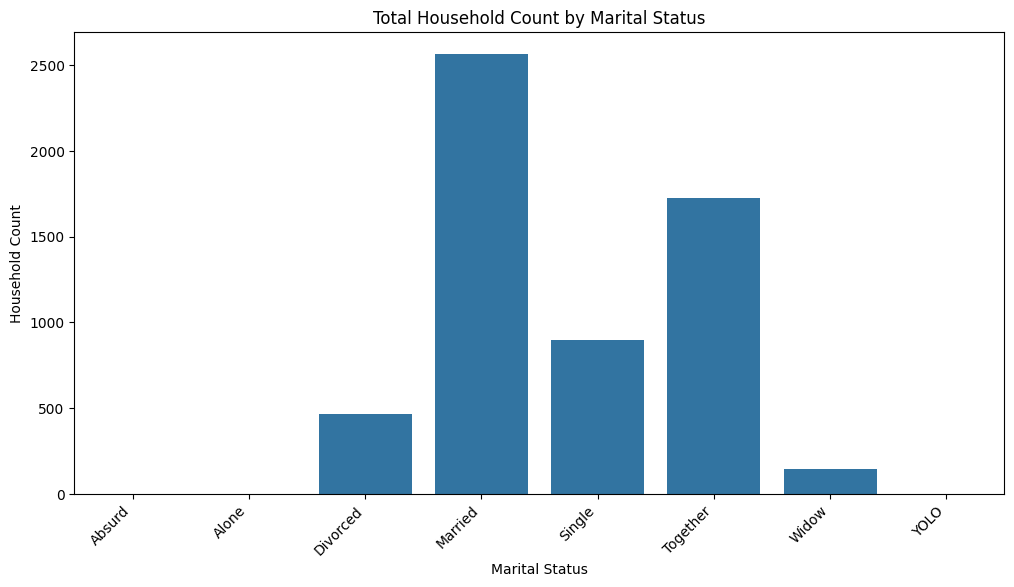

In [20]:
# Create a temporary column 'Marital_Status_Num'
df['Marital_Status_Num'] = df['Marital_Status'].replace(['Single', 'Widow', 'Divorced'], 1)
df['Marital_Status_Num'] = df['Marital_Status_Num'].replace(['Married'], 2)
df['Marital_Status_Num'] = df['Marital_Status_Num'].replace(['Together'], 2)

# Convert 'Marital_Status_Num' to numeric
df['Marital_Status_Num'] = pd.to_numeric(df['Marital_Status_Num'], errors='coerce')

# Create the 'Family' column
df['Family'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status_Num']

# Drop the temporary column
df = df.drop(columns=['Marital_Status_Num'])

# Group by 'Marital_Status' and calculate the sum of 'Family' for each group
family_counts = df.groupby('Marital_Status')['Family'].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=family_counts, x='Marital_Status', y='Family')

ax.set_title('Total Household Count by Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Household Count')

plt.xticks(rotation=45, ha='right')
plt.show()

## PREPROCESSING

## 2.1.1. Data Cleansing

## 2.1.1.1. Handling Missing Values

In [21]:
# Calculate the average income for each education status
education_income_avg = df.groupby('Education')['Income'].mean()

# Fill missing values in 'Income' with the corresponding education status average
df['Income'] = df.apply(lambda row: education_income_avg[row['Education']] if pd.isnull(row['Income']) else row['Income'], axis=1)

print("Average Income for Each Education Status:")
print(education_income_avg)

Average Income for Each Education Status:
Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64


## 2.1.1.2. Correcting Data Types

In [22]:
from datetime import datetime

# Dt_Customer object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Dt_Customer datetime to number of days since enrollment
df['Dt_Customer'] = (datetime.today() - df['Dt_Customer']).dt.days

C:\Users\aldri\AppData\Local\Temp\ipykernel_25840\198049424.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


## 2.1.2. Feature Engineering

In [23]:
df.drop(df.index[df.Year_Birth <= 1900], inplace=True)
df.drop(df.index[df.Income > 300000], inplace=True)

In [24]:
df.drop(df.index[df.MntMeatProducts > 1200], inplace=True)
df.drop(df.index[df.MntSweetProducts > 240], inplace=True)
df.drop(df.index[df.MntGoldProds > 270], inplace=True)

In [25]:
from datetime import datetime

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [26]:
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'Alone', 'YOLO'], 'Single')

In [27]:
# Create a temporary column 'Marital_Status_Num'
df['Marital_Status_Num'] = df['Marital_Status'].replace(['Single', 'Widow', 'Divorced'], 1)
df['Marital_Status_Num'] = df['Marital_Status_Num'].replace(['Married'], 2)
df['Marital_Status_Num'] = df['Marital_Status_Num'].replace(['Together'], 2)

# Create the 'Family' column
df['Family'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status_Num']

# Drop the temporary column
df = df.drop(columns=['Marital_Status_Num'])

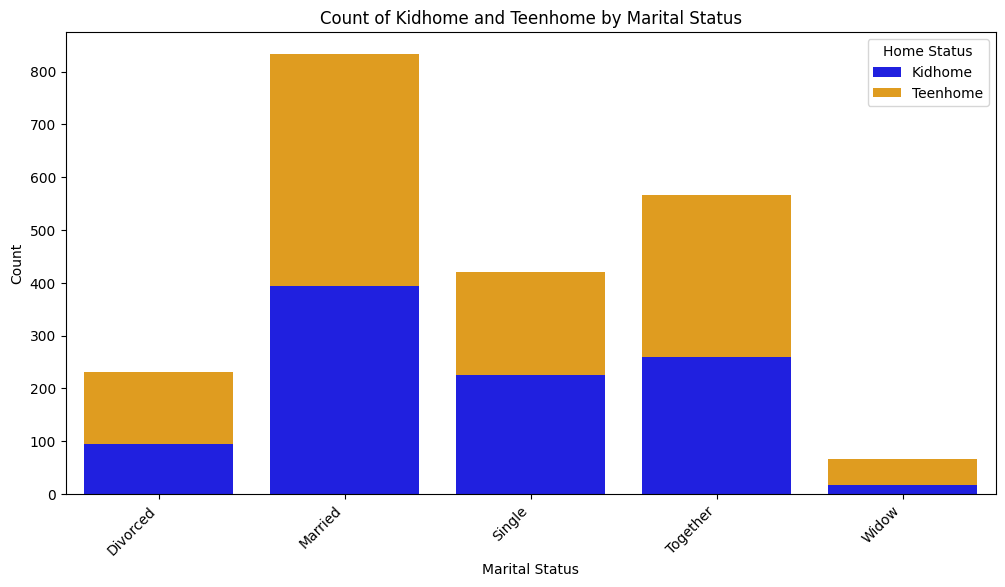

In [28]:
# Assuming 'df' is your DataFrame
marital_status_counts = df['Marital_Status'].value_counts()

# Filter the DataFrame for only relevant columns
subset_df = df[['Marital_Status', 'Kidhome', 'Teenhome']]

# Group by 'Marital_Status' and calculate the sum of 'Kidhome' and 'Teenhome' for each group
kids_teens_counts = subset_df.groupby('Marital_Status')[['Kidhome', 'Teenhome']].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=kids_teens_counts, x='Marital_Status', y='Kidhome', label='Kidhome', color='blue')
sns.barplot(data=kids_teens_counts, x='Marital_Status', y='Teenhome', bottom=kids_teens_counts['Kidhome'], label='Teenhome', color='orange')

ax.set_title('Count of Kidhome and Teenhome by Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.legend(title='Home Status', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
df = df.drop(columns=['Year_Birth'])

df = df.drop(columns=['Kidhome'])
df = df.drop(columns=['Teenhome'])
    
df = df.drop(columns=['ID'])

In [30]:
df['Marital_Status'].value_counts()

Marital_Status
Married     860
Together    576
Single      483
Divorced    231
Widow        77
Name: count, dtype: int64

In [31]:
df['Marital_Status'].value_counts()

Marital_Status
Married     860
Together    576
Single      483
Divorced    231
Widow        77
Name: count, dtype: int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2227.0,51862.473443,20984.456645,1730.0,35533.5,51563.0,68145.0,162397.0
Dt_Customer,2227.0,3882.955546,232.372185,3371.0,3711.5,3884.0,4057.0,4434.0
Recency,2227.0,49.158958,28.927984,0.0,24.0,50.0,74.0,99.0
MntWines,2227.0,305.259093,336.795295,0.0,24.0,177.0,505.0,1493.0
MntFruits,2227.0,26.367759,39.776836,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2227.0,163.925909,214.770352,0.0,16.0,67.0,230.0,984.0
MntFishProducts,2227.0,37.668163,54.718325,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2227.0,26.946565,40.753112,0.0,1.0,8.0,33.0,198.0
MntGoldProds,2227.0,43.709026,51.086125,0.0,9.0,24.0,56.0,262.0
NumDealsPurchases,2227.0,2.315222,1.876309,0.0,1.0,2.0,3.0,15.0


## Baseline Modelling

In [33]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [34]:
df = pd.get_dummies(df)
X = df.drop('Response', axis=1)
y = df.Response

X.shape, y.shape

((2227, 27), (2227,))

In [35]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=12)
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]
# Evaluate each model
for name, model in models:
    # Increase max_iter for Logistic Regression
    if name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append the results as a list instead of a dictionary
    results.append([name, accuracy, precision, recall, f1, auc])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Print the results
print(results_df)

                     Model  Accuracy  Precision    Recall  F1 Score       AUC
0      Logistic Regression  0.793722   0.396694  0.716418  0.510638  0.761903
1      K-Nearest Neighbors  0.726457   0.286822  0.552239  0.377551  0.654747
2  Support Vector Machines  0.816143   0.428571  0.671642  0.523256  0.756665
3            Decision Tree  0.840807   0.469697  0.462687  0.466165  0.685169
4            Random Forest  0.874439   0.641026  0.373134  0.471698  0.668098
